In [1]:
import numpy as np
import pandas as pd

In [3]:
df=pd.read_csv("/Users/gauravjangid/Desktop/Data Science/data set/titanic .csv")

In [4]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


<Axes: xlabel='Age'>

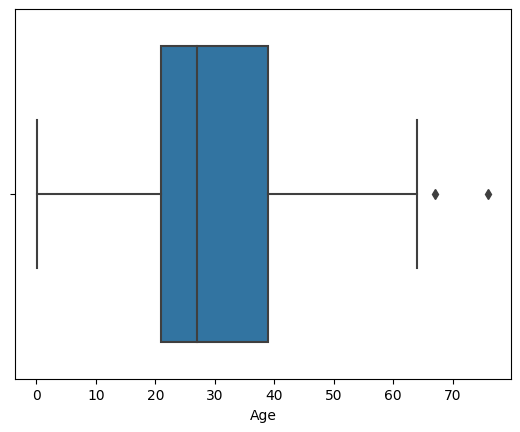

In [9]:
import seaborn as sns
sns.boxplot(x=df['Age'])

In [10]:
#1.using trimming

In [11]:
df['Age'].describe()

count    332.000000
mean      30.272590
std       14.181209
min        0.170000
25%       21.000000
50%       27.000000
75%       39.000000
max       76.000000
Name: Age, dtype: float64

In [13]:
q1=df['Age'].quantile(0.25)
q1

21.0

In [14]:
q2=df['Age'].quantile(0.75)
q2

39.0

In [16]:
IQR=q2-q1
IQR

18.0

In [17]:
upper_limit=q2+IQR*1.5
lower_limit=q1-IQR*1.5

In [18]:
upper_limit

66.0

In [19]:
lower_limit

-6.0

In [20]:
#detecting outliers

In [22]:
df[df["Age"]>upper_limit]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
81,973,0,1,"Straus, Mr. Isidor",male,67.0,1,0,PC 17483,221.7792,C55 C57,S
96,988,1,1,"Cavendish, Mrs. Tyrell William (Julia Florence...",female,76.0,1,0,19877,78.8500,C46,S


In [25]:
df[df["Age"]<lower_limit]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [26]:
#handling
df_new=df[df['Age']<upper_limit]

In [27]:
df_new

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
409,1301,1,3,"Peacock, Miss. Treasteall",female,3.0,1,1,SOTON/O.Q. 3101315,13.7750,NaN,S
411,1303,1,1,"Minahan, Mrs. William Edward (Lillian E Thorpe)",female,37.0,1,0,19928,90.0000,C78,Q
412,1304,1,3,"Henriksson, Miss. Jenny Lovisa",female,28.0,0,0,347086,7.7750,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C


<Axes: xlabel='Age'>

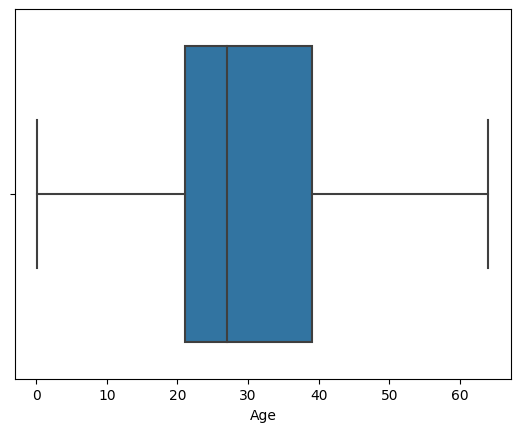

In [29]:
sns.boxplot(x=df_new['Age'])

In [30]:
new_df_cap=df.copy()

In [31]:
#2.using cap
new_df_cap['Age']=np.where(new_df_cap['Age']>upper_limit,upper_limit,
                                           np.where(new_df_cap['Age']<lower_limit,lower_limit,new_df_cap['Age']))

<Axes: xlabel='Age'>

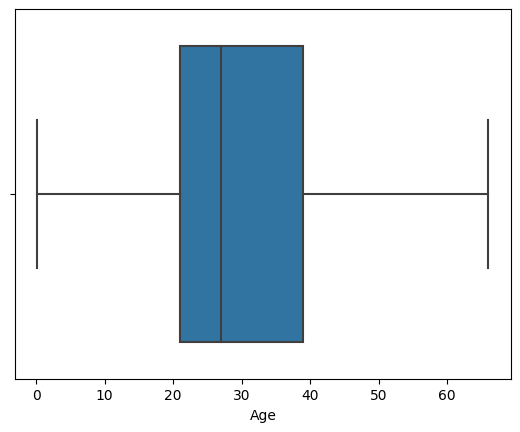

In [33]:
sns.boxplot(x=new_df_cap['Age'])